# Aerator Imports to Ecuador 2021 - 2024
Luis Paulo Vinatea Barberena  
@BarberNode  
Florianópolis, Brazil  
2025-05-27  

In [ ]:
# Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors


# Visualization settings
%matplotlib inline

# Configuration
INPUT_DIR = "../../data/raw/aquaculture/aerator_imports/"

# Global visualization settings
used_colors = set()
site_color_mapping = {}
available_css4_colors = list(mcolors.CSS4_COLORS.keys())


In [ ]:
# Load all data using a for loop
aerator_data = {}
for i in range(2021, 2025):
    file_name = f"{i}_aerators"
    file_path = os.path.join(INPUT_DIR, f"{file_name}.csv")
    aerator_data[file_name] = pd.read_csv(file_path)


In [ ]:
# Preview all the loaded datasets
for name, data in aerator_data.items():
    print(f"Dataset: {name}")
    print(data.head(), "\n")


In [ ]:
# Print all columns NOT present in all datasets
all_columns = set.intersection(
    *(set(df.columns) for df in aerator_data.values())
)
for name, df in aerator_data.items():
    missing_columns = all_columns - set(df.columns)
    if missing_columns:
        print(f"Dataset: {name}")
        print(f"Missing columns: {missing_columns}\n")
# Print all columns present in all datasets
print("All datasets have the following columns:")
print(all_columns)


In [ ]:
# Keep only the columns that are present in all datasets and concatenate all datasets into one
all_columns_list = list(all_columns)  # Convert set to list for indexing
aerator_data_combined = pd.concat(
    [
        df[all_columns_list]
        for df in aerator_data.values()
        if set(all_columns).issubset(df.columns)
    ],
    ignore_index=True,
)
# Display the combined dataset
print(aerator_data_combined.head())

# Get the datatypes of the columns
print("\nData types of the columns:")
print(aerator_data_combined.dtypes)


In [104]:
# Convert specific columns to appropriate data types

columns_to_convert = {
    "FECHA DE LIQUIDACIóN": "datetime64[ns]",
    "FECHA DE LLEGADA": "datetime64[ns]",
    "FECHA DE EMBARQUE": "datetime64[ns]",
    "FECHA PAGO": "datetime64[ns]",
    "FECHA INGRESO SISTEMA": "datetime64[ns]",
}

for col, dtype in columns_to_convert.items():
    aerator_data_combined[col] = aerator_data_combined[col].astype(dtype)
# Display the data types after conversion
print("\nData types after conversion:")
print(aerator_data_combined.dtypes)



Data types after conversion:
PESO NETO KG                             float64
NUMERO DE MANIFIESTO                      object
NAVE                                      object
MARCA                                     object
EMBARCADOR                                object
PROBABLE IMPORTADOR                       object
AñO FABRICACIóN                          float64
VIA DE TRANSPORTE                         object
UNIDAD DE MEDIDA                          object
REFRENDO                                  object
PARTIDA ARANCELARIA                        int64
MES                                        int64
FECHA DE LIQUIDACIóN              datetime64[ns]
FECHA DE LLEGADA                  datetime64[ns]
MARCA COMERCIAL                           object
PAIS DE PROCEDENCIA                       object
CARACTERISTICAS                           object
DAU                                      float64
DIRECCIóN CONSIGNATARIO                   object
FECHA AFORO                            

In [ ]:
# Check for missing values in the combined dataset
missing_values = aerator_data_combined.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])
# Print the shape of the combined dataset
print("\nShape of the combined dataset:")
print(aerator_data_combined.shape)

# Preview the shape if we drop all rows with missing values
aerator_data_combined_dropped = aerator_data_combined.dropna()
print("\nShape of the dataset after dropping rows with missing values:")
print(aerator_data_combined_dropped.shape)


In [ ]:
# Dictionary of values that are the same but treated as unique
brand_mapping = {
    "SIN MARCA": "GENERICO",
    "S/MARCA": "GENERICO",
    "SINMARCA": "GENERICO",
    "SMARCA": "GENERICO",
    "S/M": "GENERICO",
    "SM": "GENERICO",
    "N-M": "GENERICO",
}

model_mapping = {
    "SIN MODELO": "GENERICO",
    "SIN MODELO,": "GENERICO",
    "S/MODELO": "GENERICO",
    "SMODELO": "GENERICO",
    "S/M": "GENERICO",
    "SM": "GENERICO",
    "N-M": "GENERICO",
}

# Create a clean working copy to avoid SettingWithCopyWarning
aerator_data_clean = aerator_data_combined_dropped.copy()

# Fill NaN values in brand and model columns with "GENERICO"
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].fillna("GENERICO")
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].fillna("GENERICO")

# Apply the mappings to the 'MARCA' and 'MODELO MERCADERIA' columns
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].replace(
    brand_mapping
)
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].replace(model_mapping)

# Standardize case (uppercase) for consistency
aerator_data_clean["MARCA"] = aerator_data_clean["MARCA"].str.upper()
aerator_data_clean["MODELO MERCADERIA"] = aerator_data_clean[
    "MODELO MERCADERIA"
].str.upper()

# Also clean the MARCA COMERCIAL column for consistency
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].fillna("GENERICO")
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].replace(brand_mapping)
aerator_data_clean["MARCA COMERCIAL"] = aerator_data_clean[
    "MARCA COMERCIAL"
].str.upper()

# Display summary of cleaned data
print(f"Total records: {len(aerator_data_clean)}")
print(
    f"Records with non-generic brands: {sum(aerator_data_clean['MARCA'] != 'GENERICO')}"
)
print(
    f"Records with non-generic models: {sum(aerator_data_clean['MODELO MERCADERIA'] != 'GENERICO')}"
)

# Display the top 10 most common values in the 'MARCA' and 'MODELO MERCADERIA' columns
print("\nTop 10 most common brands:")
print(aerator_data_clean["MARCA"].value_counts().head(10))
print("\nTop 10 most common models:")
print(aerator_data_clean["MODELO MERCADERIA"].value_counts().head(10))


In [ ]:
# From the cleaned data, we will filter out the GENERICO brands
aerator_data_filtered = aerator_data_clean[
    aerator_data_clean["MARCA"] != "GENERICO"
]

# Display the shape of the filtered dataset
print("\nShape of the filtered dataset (excluding GENERICO brands):")
print(aerator_data_filtered.shape)
# Display the top 10 most common brands in the filtered dataset
print("\nTop 10 most common brands in the filtered dataset:")
print(aerator_data_filtered["MARCA"].value_counts().head(10))


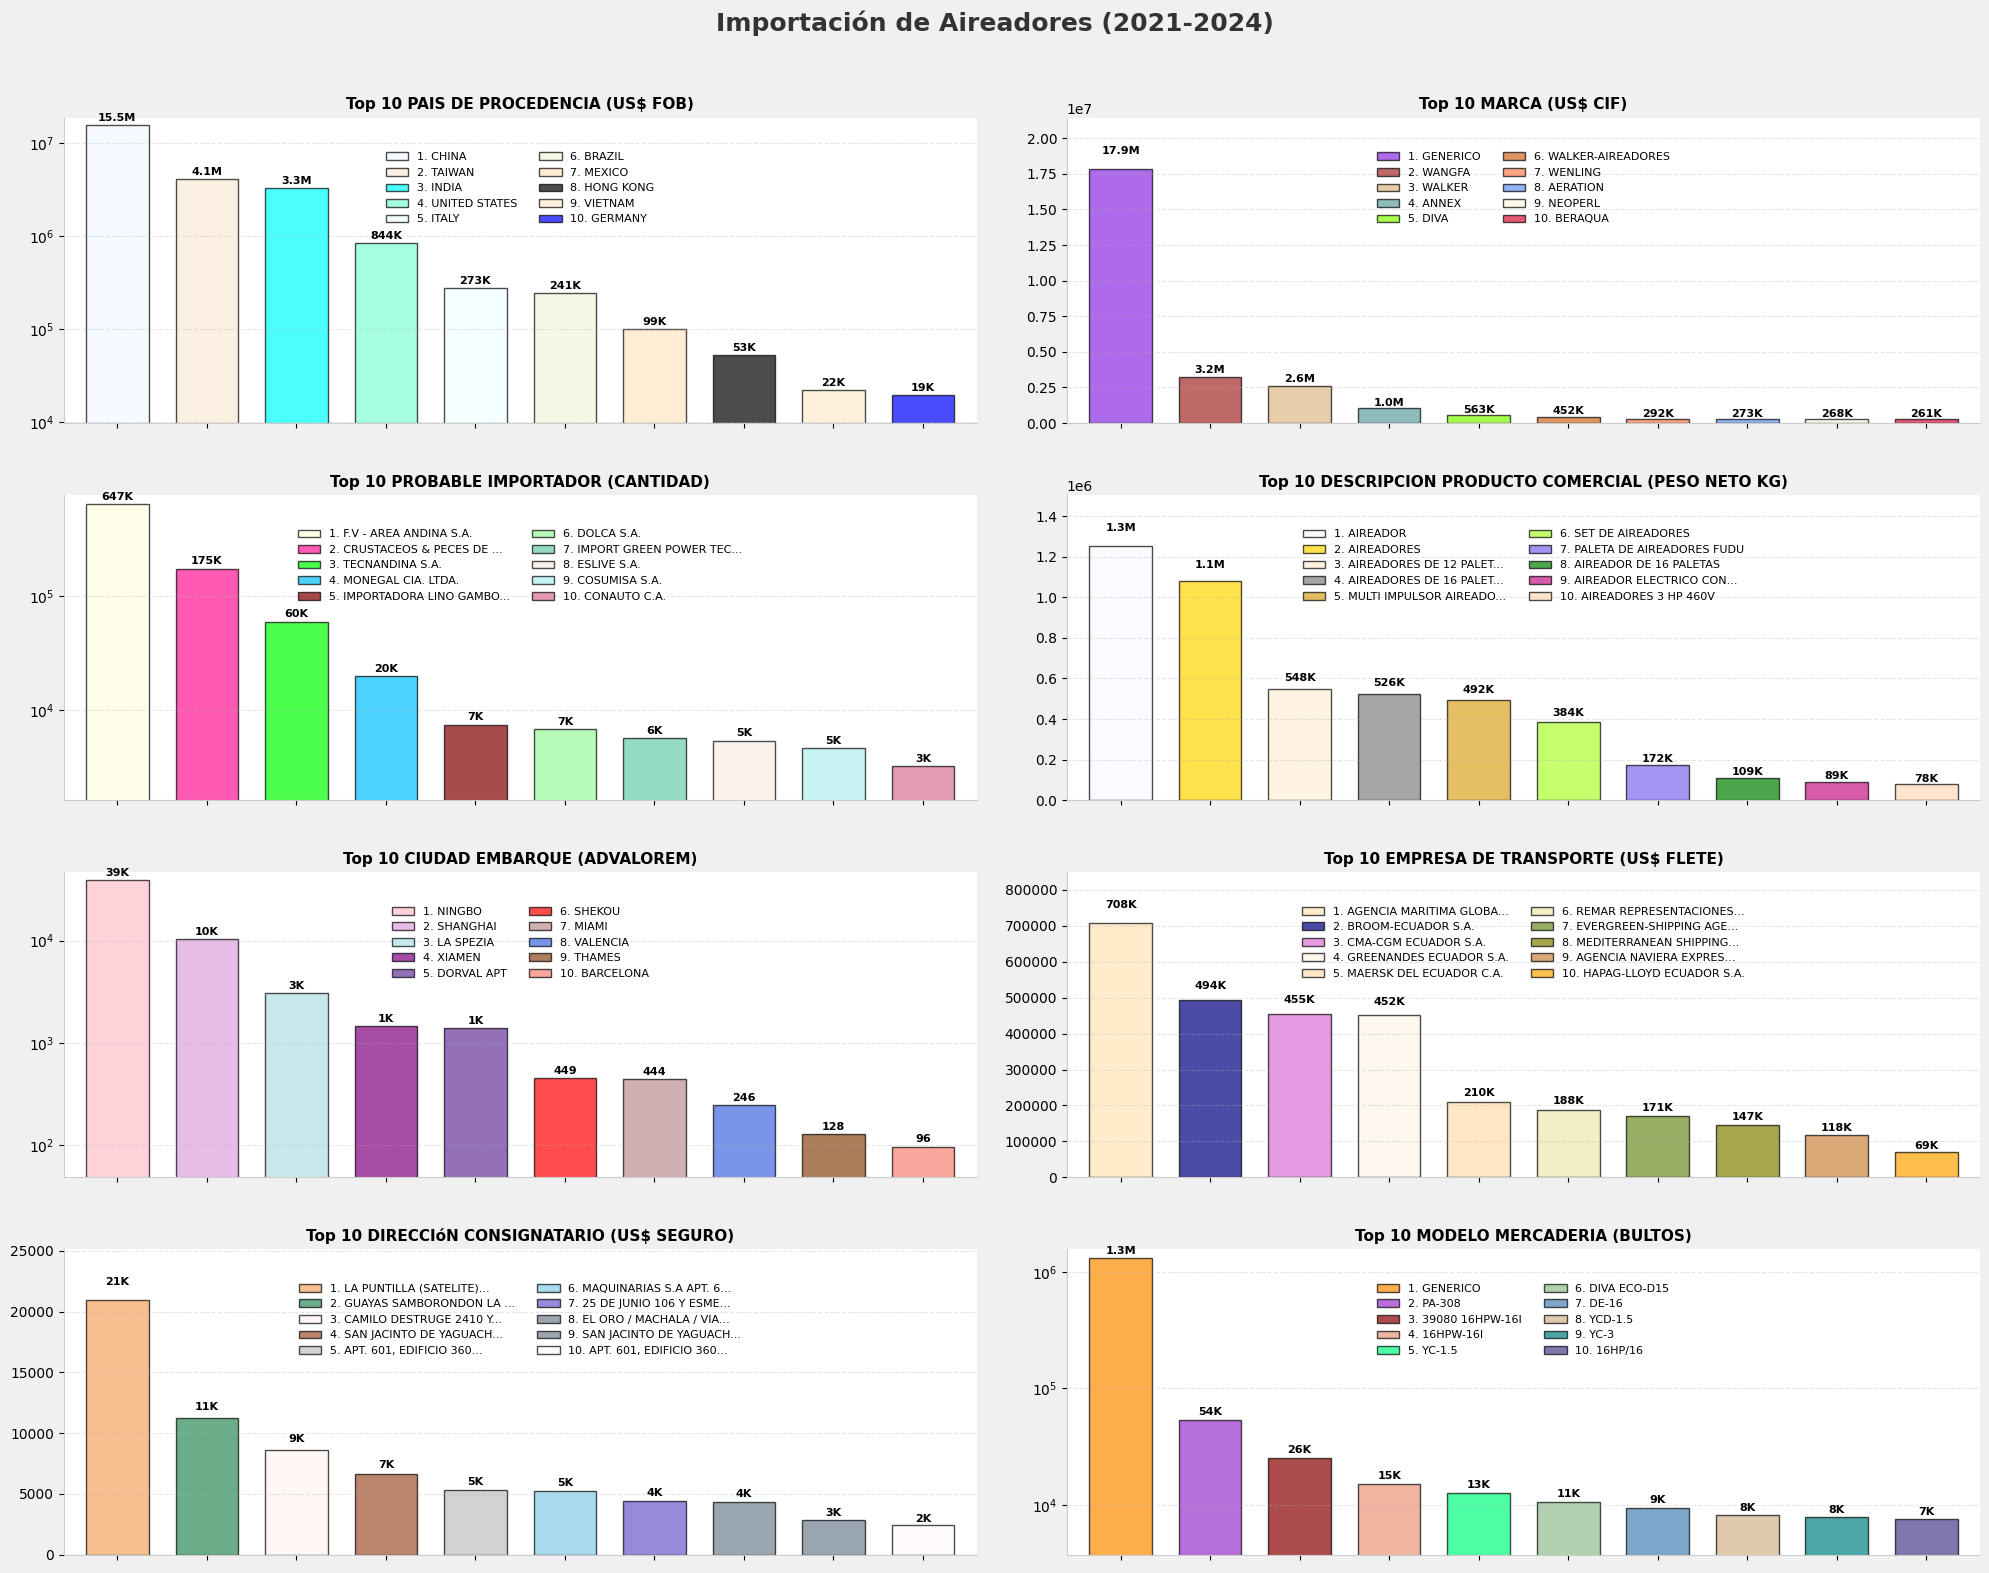

In [107]:
# Create a dashboard of bar charts
def create_dashboard(df, figsize=(20, 16)):
    # Select some important columns for analysis
    # Numeric columns for y-axis values
    numeric_cols = [
        "US$ FOB",
        "US$ CIF",
        "CANTIDAD",
        "PESO NETO KG",
        "ADVALOREM",
        "US$ FLETE",
        "US$ SEGURO",
        "BULTOS",
    ]
    # Categorical columns for x-axis
    categorical_cols = [
        "PAIS DE PROCEDENCIA",
        "MARCA",
        "PROBABLE IMPORTADOR",
        "DESCRIPCION PRODUCTO COMERCIAL",
        "CIUDAD EMBARQUE",
        "EMPRESA DE TRANSPORTE",
        "DIRECCIóN CONSIGNATARIO",
        "MODELO MERCADERIA",
    ]

    # Function to get color for categories
    def get_category_color(category, category_type):
        # Check if we already have a color mapping for this category
        key = f"{category_type}_{category}"
        if key not in site_color_mapping:
            # Assign a new color that hasn't been used yet
            for color in available_css4_colors:
                if color not in used_colors:
                    used_colors.add(color)
                    site_color_mapping[key] = color
                    break
        return site_color_mapping[key]

    # Create a 4X2 grid of bar charts to accommodate more categories
    fig, axes = plt.subplots(4, 2, figsize=figsize)
    axes = axes.flatten()
    # Set the background color for the figure
    fig.patch.set_facecolor("#f0f0f0")
    # Set the background color for each axis
    for ax in axes:
        ax.set_facecolor("#ffffff")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#cccccc")
        ax.spines["bottom"].set_color("#cccccc")
    # Set the title for the entire figure
    fig.suptitle(
        "Importación de Aireadores (2021-2024)",
        fontsize=18,
        fontweight="bold",
        color="#333333",
        y=0.98,
    )

    # For each pair of numeric and categorical columns
    for i, (num_col, cat_col) in enumerate(
        zip(numeric_cols, categorical_cols)
    ):
        if i < len(axes):
            # Group by the categorical column and sum the numeric values
            grouped_data = (
                df.groupby(cat_col)[num_col]
                .sum()
                .nlargest(10)
                .sort_values(ascending=False)
            )

            # Get minimum non-zero value for log scale
            min_value = (
                grouped_data[grouped_data > 0].min()
                if any(grouped_data > 0)
                else 1
            )

            # Get color list for this category
            colors = [
                get_category_color(cat, cat_col) for cat in grouped_data.index
            ]

            # Create vertical bar chart
            bars = grouped_data.plot(
                kind="bar",
                ax=axes[i],
                color=colors,
                edgecolor="black",
                alpha=0.7,
                legend=False,
                fontsize=10,
                width=0.7,
                grid=False,
            )

            # Use semi-log scale for better representation of small values
            if (
                grouped_data.max() / min_value > 100
            ):  # Only use log scale if the range is large
                axes[i].set_yscale(
                    "symlog"
                )  # Use symlog scale to handle zeros
                axes[i].set_ylim(min_value * 0.5, grouped_data.max() * 1.2)
            else:
                # For smaller ranges, use linear scale but start from a lower value
                axes[i].set_ylim(0, grouped_data.max() * 1.2)

            # Customize the chart - now with no axis labels
            axes[i].set_title(
                f"Top 10 {cat_col} ({num_col})",
                fontsize=11,
                fontweight="bold",
            )

            # Remove x and y labels for cleaner look
            axes[i].set_ylabel("")
            axes[i].set_xlabel("")

            # Add value labels to the bars
            for bar in bars.patches:
                height = bar.get_height()
                value_text = f"{height:,.0f}"
                if height > 1000000:  # Format large numbers with M suffix
                    value_text = f"{height / 1000000:.1f}M"
                elif height > 1000:
                    value_text = f"{height / 1000:.0f}K"

                axes[i].text(
                    bar.get_x() + bar.get_width() / 2,
                    height * 1.05,  # Position text just above bar
                    value_text,
                    ha="center",
                    va="bottom",
                    fontsize=8,
                    fontweight="bold",
                    rotation=0,
                )

            # Hide x-tick labels since we have a legend
            plt.setp(axes[i].get_xticklabels(), visible=False)

            # Create a custom legend
            legend_elements = []
            for j, (cat, val) in enumerate(grouped_data.items()):
                color = colors[j]
                if pd.notna(cat):  # Skip if category is NaN
                    # Truncate long names
                    display_name = str(cat)
                    if len(display_name) > 25:
                        display_name = display_name[:22] + "..."
                    legend_elements.append(
                        plt.Rectangle(
                            (0, 0),
                            1,
                            1,
                            fc=color,
                            alpha=0.7,
                            edgecolor="black",
                            label=f"{j + 1}. {display_name}",
                        )
                    )

            # Place legend below the chart
            axes[i].legend(
                handles=legend_elements,
                loc="upper center",
                bbox_to_anchor=(0.5, 0.92),
                ncol=2,
                fontsize=8,
                frameon=False,
            )

            # Add 1-10 numbers on x-axis for reference
            axes[i].set_xticks(np.arange(len(grouped_data)))
            axes[i].set_xticklabels(range(1, len(grouped_data) + 1))

            # Add grid lines for y-axis only for better readability
            axes[i].grid(axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=3.0, w_pad=2.0)
    return fig


# Call the function with the dataset
fig = create_dashboard(aerator_data_clean)
plt.show()
